In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import copy

# We import the model, stimuli, and the optimal control package
from neurolib.models.aln import ALNModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.control.optimal_control import oc_aln, cost_functions
from neurolib.experiments.WPtwo.onen.plot import plot_1n_osc, plot_1n_osc_noisy

import matplotlib as mpl
label_size= 20
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['font.size'] = label_size
mpl.rcParams['axes.titlesize'] = label_size

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

# This function reads out the final state of a simulation
def getfinalstate(model):
    N = model.params.Cmat.shape[0]
    V = len(model.state_vars)
    T = model.getMaxDelay() + 1
    state = np.zeros((N, V, T))
    for v in range(V):
        if "rates" in model.state_vars[v] or "IA" in model.state_vars[v]:
            for n in range(N):
                state[n, v, :] = model.state[model.state_vars[v]][n, -T:]
        else:
            for n in range(N):
                state[n, v, :] = model.state[model.state_vars[v]][n]
    return state


def setinitstate(model, state):
    N = model.params.Cmat.shape[0]
    V = len(model.init_vars)
    T = model.getMaxDelay() + 1

    for n in range(N):
        for v in range(V):
            if "rates" in model.init_vars[v] or "IA" in model.init_vars[v]:
                model.params[model.init_vars[v]] = state[:, v, -T:]
            else:
                model.params[model.init_vars[v]] = state[:, v, -1]

    return

def getstate(model):
    state = np.concatenate(  ( np.concatenate((model.params["rates_exc_init"][:, np.newaxis, -1],
                                            model.params["rates_inh_init"][:, np.newaxis, -1],
                                            model.params["IA_init"][:, np.newaxis, -1], ), axis=1, )[:, :, np.newaxis],
                            np.stack((model.rates_exc, model.rates_inh, model.IA), axis=1),),axis=2,  )
    
    return state

while "Promotion/neurolib" in os.getcwd():
    os.chdir('..')

pickledir = os.path.join(os.getcwd(), "neurolib_aln_osc_datastorage/optimal_control/WP2/1n")
dir = os.path.join(pickledir, "images_1n_aln_w1D")

print(dir)

/home/lena/Promotion/neurolib_aln_osc_datastorage/optimal_control/WP2/1n/images_1n_aln_w1D


In [2]:
w_array_list = []

w_array_list.append(1e-2 * np.arange(1.0, 11., 1.))
w_array_list.append(1e-2 * np.arange(1.0, 11., 1.))
w_array_list.append(1e-2 * np.arange(1.0, 11., 1.))
w_array_list.append(1e-2 * np.arange(1.0, 11., 1.))

In [3]:
data = dict()
p_names = ["A", "B", "C", "D"]
coords = [[0., 0.7], [1., 1.5], [2., 0.8], [2.5, 1.8]]

for i in range(len(p_names)):

    p = p_names[i]
    data[p] = dict()
    data[p]["coordinates"] = coords[i]
    data[p]["target_period"] = 20.
    data[p]["control"] = [None for x in range(len(w_array_list[i]))]
    data[p]["state"] = [None for x in range(len(w_array_list[i]))]
    data[p]["w1"] = w_array_list[i].copy()
    data[p]["init_state"] = None

N = 1
model = ALNModel()
dt = model.params.dt

In [4]:
testd = 20000.
model.params.duration = testd
test_input = ZeroInput().generate_input(duration=testd+model.params.dt, dt=model.params.dt)
model.params["ext_exc_current"] = test_input
model.params["ext_inh_current"] = test_input

for i in range(len(p_names)):
    
    p = data[p_names[i]]["coordinates"]
    print("pind = ", i, p_names[i], p)

    model.params.mue_ext_mean = p[0]
    model.params.mui_ext_mean = p[1]
    model.run()

    data[p_names[i]]["init_state"] = getfinalstate(model)

pind =  0 A [0.0, 0.7]
pind =  1 B [1.0, 1.5]
pind =  2 C [2.0, 0.8]
pind =  3 D [2.5, 1.8]


In [5]:
controlmat = np.zeros((N,4))
controlmat[:,0] = 1.

costmat = np.zeros((N, 3))
costmat[:,0] = 1.

duration = 160.
model.params.duration = duration
zero_input0 = ZeroInput().generate_input(duration=duration+model.params.dt, dt=model.params.dt)
zero_input = np.vstack( ([zero_input0]*2) )[np.newaxis,:,:]
zero_control = np.vstack( ([zero_input]*N))

it = 5
maxstr = 5
pr = np.arange(0,101,10)

In [19]:
for i in range(len(p_names)):
    print(i)
    
    p = p_names[i]
    print(data[p]["w1"][0])
    data[p]["w1"] *= 2
    print(data[p]["w1"][0])

0
0.2
0.5
1
0.2
0.5
2
0.2
0.5
3
0.2
0.5


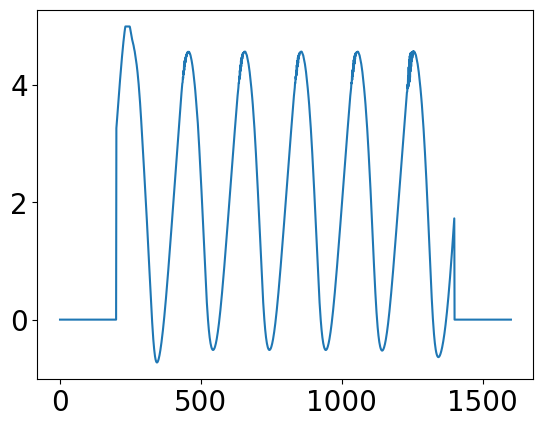

In [30]:
plt.plot(data["B"]["control"][2][0,0,:])
plt.show()

data["B"]["control"][1][0,0,:] = data["B"]["control"][0][0,0,:].copy()

/home/lena/.local/lib/python3.9/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 3 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/lena/.local/lib/python3.9/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 3 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/lena/.local/lib/python3.9/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 3 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/lena/.local/lib/python3.9/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 3 significant fi

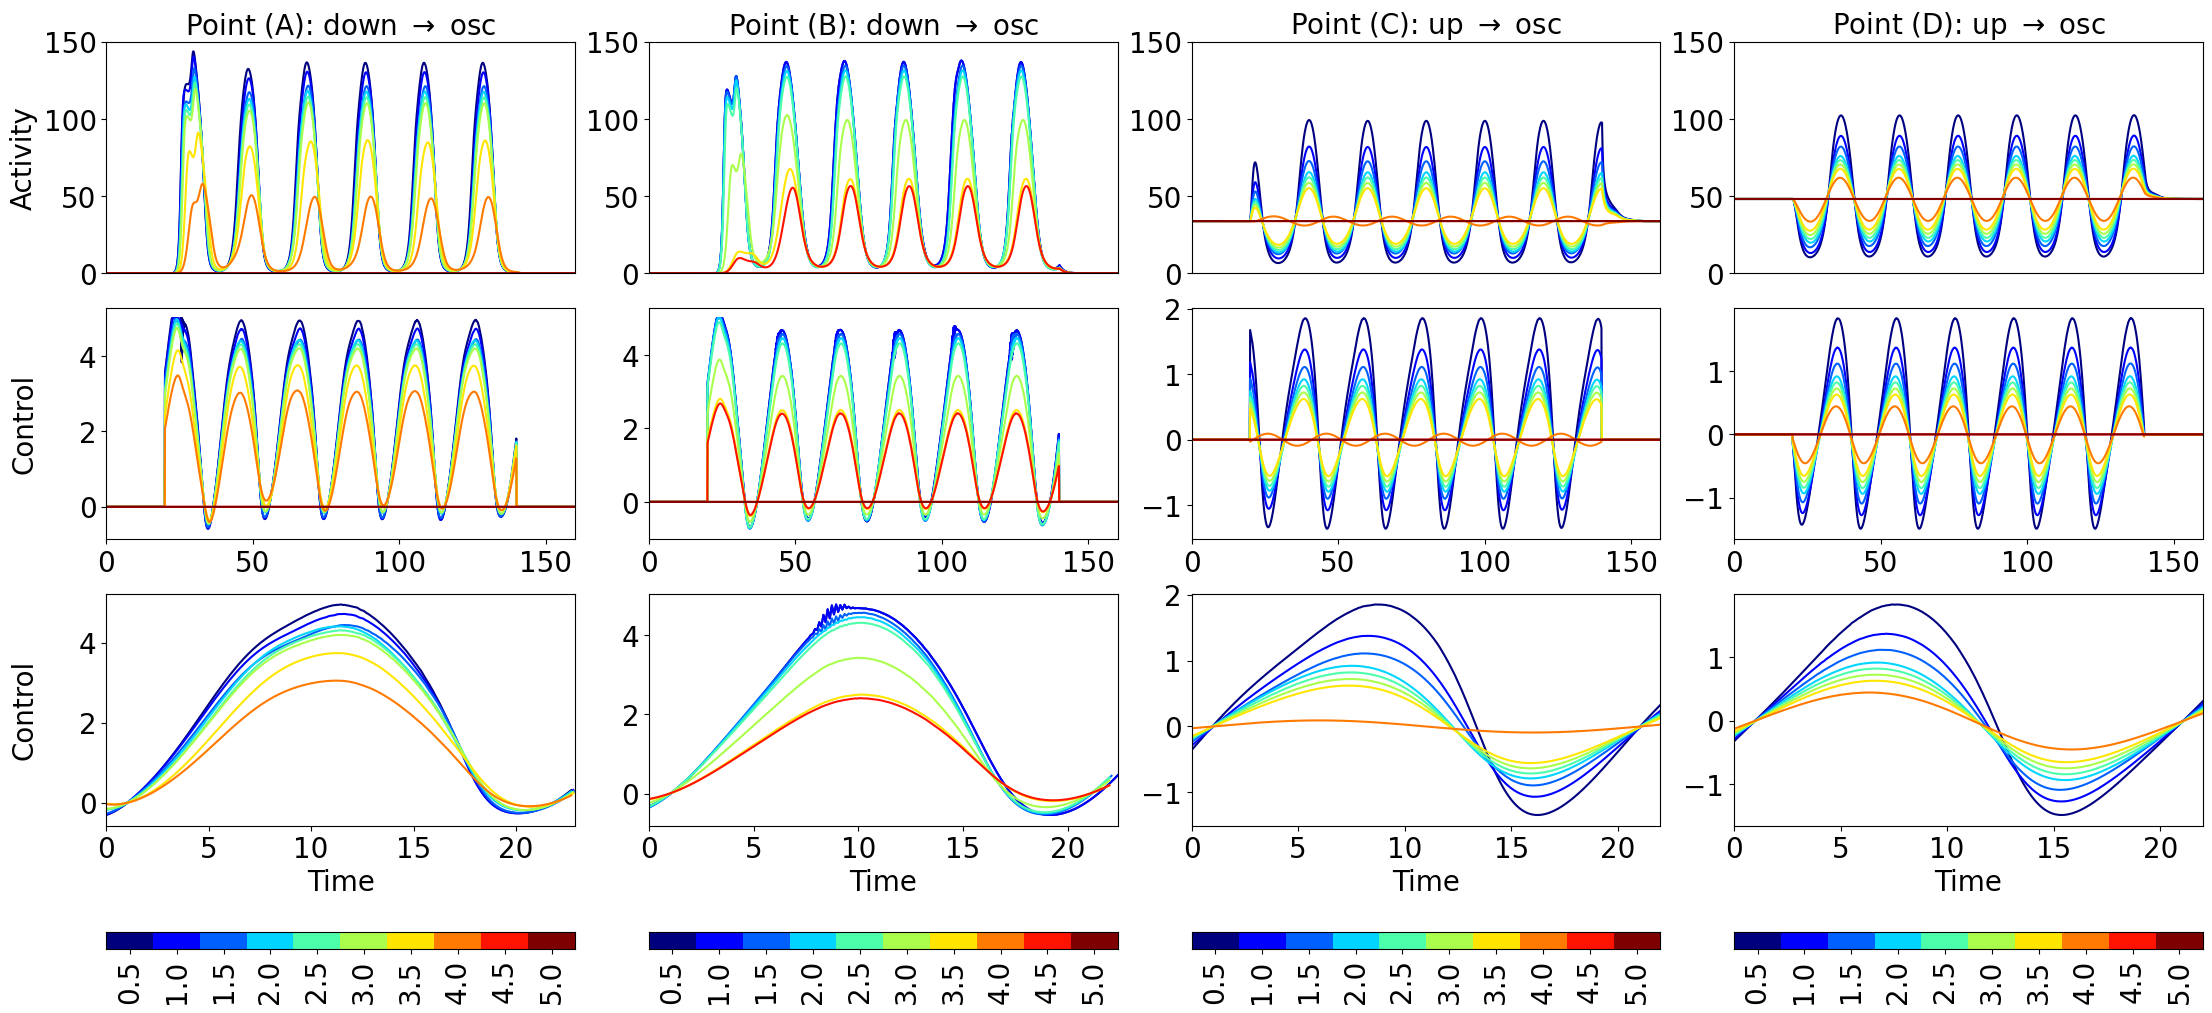

In [8]:
indzoom = np.zeros((len(p_names), len(w_array_list[0])))
indzoom[0,:] = 4
indzoom[1,:] = 6
indzoom[2,:] = 4
indzoom[3,:] = 4

indzoom[2,7] = 5
indzoom[3,3:8] = 5

plot_1n_osc([ data["A"]["state"], data["B"]["state"], data["C"]["state"], data["D"]["state"] ],
            [ data["A"]["control"], data["B"]["control"], data["C"]["control"], data["D"]["control"] ],
            duration, model.params.dt,
            [ data["A"]["w1"], data["B"]["w1"], data["C"]["w1"], data["D"]["w1"], ],
            indzoom, os.path.join(dir, "ALN_w1D.pdf")
            )

In [8]:
with open(os.path.join(pickledir, 'osc_1n_aln_w1D.pickle'), 'wb') as f:
    pickle.dump(data, f)

In [7]:
with open(os.path.join(pickledir, 'osc_1n_aln_w1D.pickle'), 'rb') as f:
    res_read = pickle.load(f)
    print(res_read.keys() )

data = res_read.copy()

dict_keys(['A', 'B', 'C', 'D'])


In [11]:
data_noisy = dict()
sigma_array = [0.1, 0.3, 0.5] ### 0.1 zu schwach
M = 100
w2_n = 4

for i in range(len(p_names)):
    p = p_names[i]
    if p != "D": continue
    data_noisy = dict()
    data_noisy["coordinates"] = coords[i]
    data_noisy["target_period"] = 20.
    data_noisy["control"] = [[None for x in range(len(sigma_array))] for x1 in range(w2_n)]
    data_noisy["state"] = [[None for x in range(len(sigma_array))] for x1 in range(w2_n)]
    data_noisy["cost"] = np.zeros((w2_n, len(sigma_array)))
    data_noisy["w1"] = np.array([0.04, 0.1, 0.2, 0.3])

    data_noisy["control_det"] = data[p]["control"][1].copy()
    data_noisy["cost_det"] = np.zeros((w2_n, len(sigma_array)))
    data_noisy["state_det"] = [[None for x in range(len(sigma_array))] for x1 in range(w2_n)]

    data_noisy["control_det_opt"] = [[data[p]["control"][1].copy() for x in range(len(sigma_array))] for x1 in range(w2_n)]
    data_noisy["cost_det_opt"] = np.zeros((w2_n, len(sigma_array)))
    data_noisy["state_det_opt"] = [[None for x in range(len(sigma_array))] for x1 in range(w2_n)]

    data_noisy["state_det_opt_det"] = [[None for x in range(len(sigma_array))] for x1 in range(w2_n)]

In [12]:
it = 100

p = data_noisy["coordinates"]
pr = np.arange(0,101,10)

target_period = data_noisy["target_period"]
int0 = 200
int1 = int0 + int(target_period/dt)*6

In [13]:
wind = 0

for si in range(len(sigma_array)):
    
    print("SIGMA = ", sigma_array[si])
    w2 = data_noisy["w1"][wind]

    model.params.sigma_ou = sigma_array[si]
    model.params.duration = duration
    setinitstate(model, data["D"]["init_state"])

    model.params["ext_exc_current"] = zero_control[:,0,:]
    model.params["ext_inh_current"] = zero_control[:,0,:]
    model.params.mue_ext_mean = p[0]
    model.params.mui_ext_mean = p[1]
    model.run()
    
    if True:

        model_controlled = oc_aln.OcAln(model, target_period, print_array=pr, cost_interval=(int0,int1), control_interval=(int0, int1),
                                        cost_matrix=costmat, control_matrix=controlmat, M=M, M_validation=M*10, validate_per_step=False,
        )
        model_controlled.weights["w_p"] = 0.
        model_controlled.weights["w_1D"] = w2
        model_controlled.weights["w_f"] = 1.

        model_controlled.maximum_control_strength = maxstr

        if True:
            if type(data_noisy["control"][wind][si]) != type(None):
                model_controlled.control = data_noisy["control"][wind][si].copy()
                model_controlled.update_input()

        for l in range(2):
            for k in range(-4,2,2):
                model_controlled.step = 10.**k
                model_controlled.optimize(it)
                model_controlled.zero_step_encountered = False
                model_controlled.control[0,0,:] = smooth(model_controlled.control.copy()[0,0,:], 2)
                model_controlled.update_input()

                #print(l, k)
                #plt.plot(model_controlled.control[0,0,:])
                #plt.plot(model_controlled.gradient[0,0,:])
                #plt.show()

        data_noisy["control"][wind][si] = model_controlled.control.copy()
        data_noisy["cost"][wind][si] = model_controlled.cost_validation

        meanstate = model_controlled.get_xs()
        for m in range(M-1):
            model_controlled.model.run()
            meanstate += model_controlled.get_xs()
        data_noisy["state"][wind][si] = meanstate / M
    
    #################################################
    data_noisy["cost_det"][wind][si], data_noisy["state_det"][wind][si] = get_noisy_cost(data_noisy["control_det"], M, sigma_array[si], model_controlled.weights["w_f"], model_controlled.weights["w_1D"])
    print("cost det = ", data_noisy["cost_det"][wind][si])

    #################################################

    if True:

        model_controlled = oc_aln.OcAln(model, target_period, print_array=pr, cost_interval=(int0,int1), control_interval=(int0, int1),
                                        cost_matrix=costmat, control_matrix=controlmat, M=M, M_validation=M*10, validate_per_step=False,
        )

        model_controlled.weights["w_p"] = 0.
        model_controlled.weights["w_1D"] = w2
        model_controlled.weights["w_f"] = 1.
        model_controlled.maximum_control_strength = maxstr

        model_controlled.control = data_noisy["control_det"].copy()

        if True:
            if type(data_noisy["control_det_opt"][wind][si]) != type(None):
                model_controlled.control = data_noisy["control_det_opt"][wind][si].copy()
        
        model_controlled.update_input()
        
        for l in range(2):
            for k in range(-4,2,2):
                model_controlled.step = 10.**k
                model_controlled.optimize(it)
                model_controlled.zero_step_encountered = False
                model_controlled.control[0,0,:] = smooth(model_controlled.control.copy()[0,0,:], 2)
                model_controlled.update_input()

                #print(l, k)
                #plt.plot(model_controlled.control[0,0,:])
                #plt.plot(model_controlled.gradient[0,0,:])
                #plt.show()

        data_noisy["control_det_opt"][wind][si] = model_controlled.control.copy()
        data_noisy["cost_det_opt"][wind][si] = model_controlled.cost_validation

        model_controlled.update_input()

        meanstate = model_controlled.get_xs()
        for m in range(M-1):
            model_controlled.model.run()
            meanstate += model_controlled.get_xs()
        data_noisy["state_det_opt"][wind][si] = meanstate / M
        plt.show()

    if True:
        model.params.sigma_ou = 0.
        model.params.duration = duration
        model.params.mue_ext_mean = p[0]
        model.params.mui_ext_mean = p[1]
        setinitstate(model, data["D"]["init_state"])

        model.params["ext_exc_current"] = data_noisy["control_det_opt"][wind][si][:,0,:]
        model.params["ext_inh_current"] = data_noisy["control_det_opt"][wind][si][:,1,:]

        model.run()
        data_noisy["state_det_opt_det"][wind][si] = getstate(model)

    with open(os.path.join(pickledir, 'osc_1n_aln_noisy_w1D.pickle'), 'wb') as f:
        pickle.dump(data_noisy, f)

SIGMA =  0.1
Optimal control with target oscillation period
Compute control for a noisy system
Mean cost in iteration 0: -1.372435708438119
Mean cost in iteration 10: -1.4478970296390836
Mean cost in iteration 20: -1.5258887057712351
Mean cost in iteration 30: -1.4419994231470514
Mean cost in iteration 40: -1.3211499709645043
Mean cost in iteration 50: -1.4065430853021303
Mean cost in iteration 60: -1.3844287450334523
Mean cost in iteration 70: -1.4756580844837737
Mean cost in iteration 80: -1.3546395351391285
Mean cost in iteration 90: -1.4942947976845644
Mean cost in iteration 100: -1.5591883213403608
Minimal cost found at iteration 100
Final cost validated with 1000 noise realizations : -1.4125572362092529
Compute control for a noisy system
Mean cost in iteration 0: -1.333725418670698
Mean cost in iteration 10: -1.3909428920034204
Mean cost in iteration 20: -1.3346021791183746
Mean cost in iteration 30: -1.4226868191942115
Mean cost in iteration 40: -1.5559601029933625
Mean cost in 

/home/lena/.local/lib/python3.9/site-packages/numba/core/ir_utils.py:2119: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'interval' of function 'fourier_cost'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "neurolib/neurolib/control/optimal_control/cost_functions.py", line 194:
@numba.njit
def fourier_cost(data, dt, target_period, cost_matrix, interval):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


cost det =  -36.00137385557957
Optimal control with target oscillation period
Compute control for a noisy system
Mean cost in iteration 0: -37.57718766863873
Mean cost in iteration 10: -37.63274731997671
Mean cost in iteration 20: -37.57010427448483
Mean cost in iteration 30: -37.715221152013825
Mean cost in iteration 40: -37.616291624822345
Mean cost in iteration 50: -37.829435488373335
Mean cost in iteration 60: -37.530865347974625
Mean cost in iteration 70: -37.72625752097337
Mean cost in iteration 80: -37.71213026383735
Mean cost in iteration 90: -37.65246456443197
Mean cost in iteration 100: -37.771045682844445
Minimal cost found at iteration 35
Final cost validated with 1000 noise realizations : -37.68510030742021
Compute control for a noisy system
Mean cost in iteration 0: -37.716506513216466
Mean cost in iteration 10: -37.52415456032708
Mean cost in iteration 20: -37.652688823755476
Mean cost in iteration 30: -37.58888605385428
Mean cost in iteration 40: -37.762875414633385
Mea

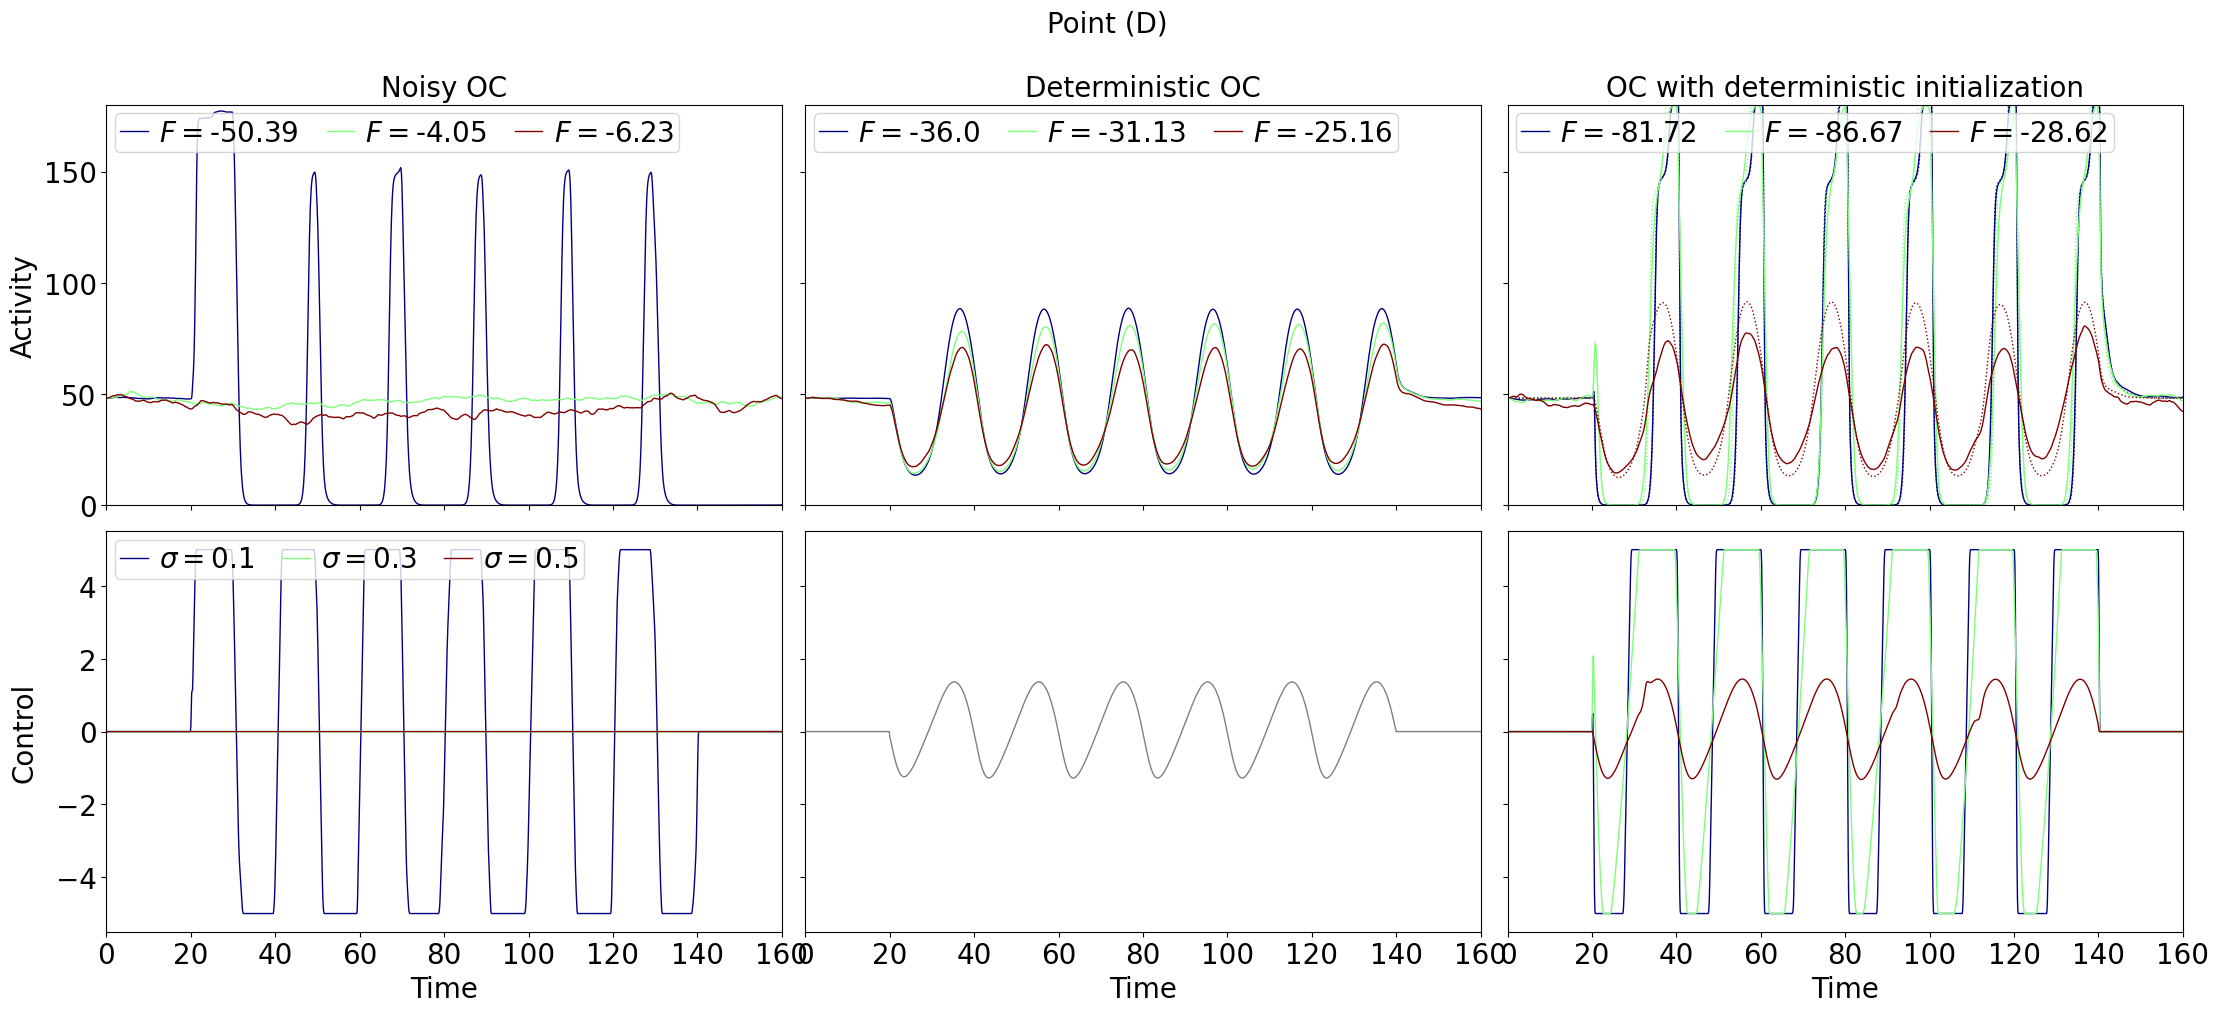

-50.386 & -4.051 & -6.233 & -36.001 & -31.131 & -25.157 & -81.724 & -86.668 & -28.618 \\


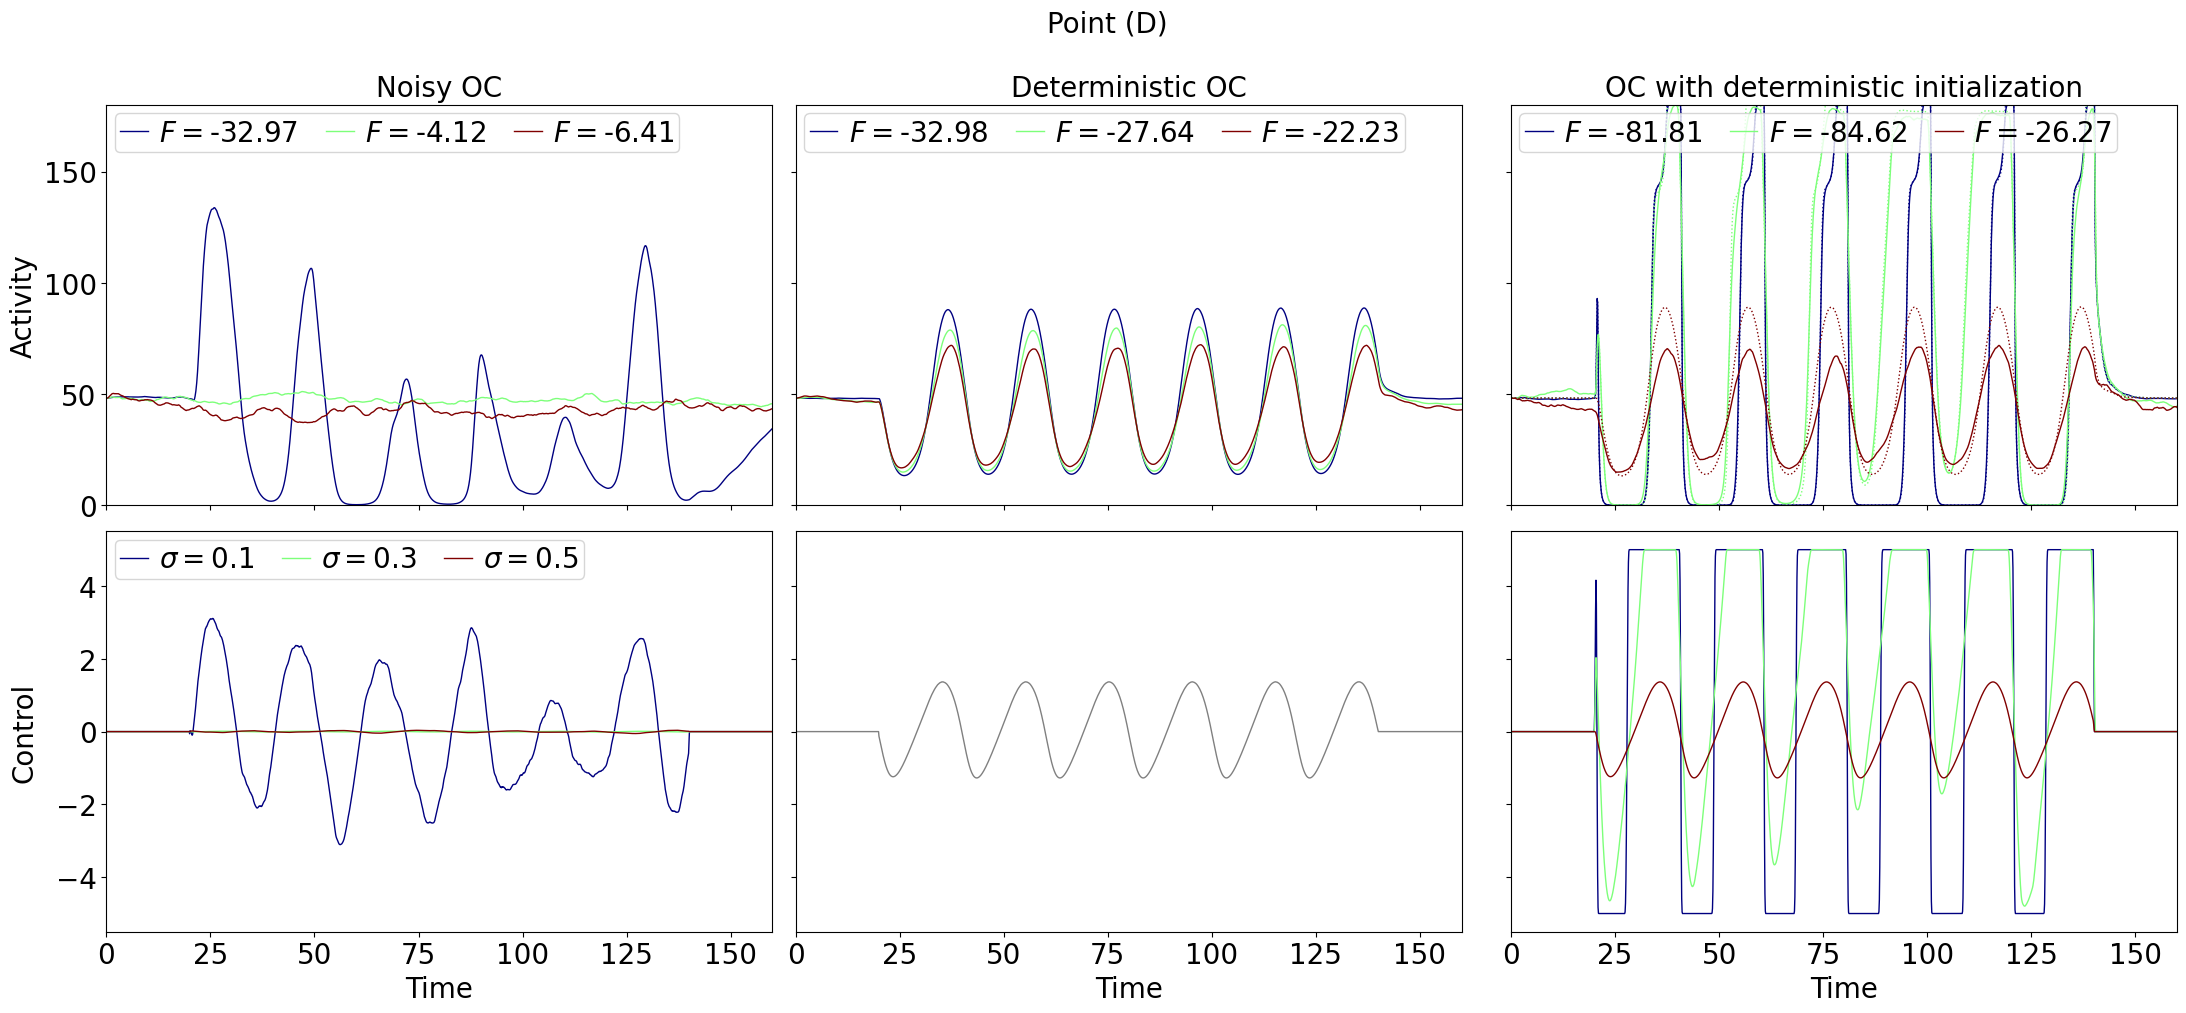

-32.969 & -4.119 & -6.405 & -32.982 & -27.635 & -22.229 & -81.806 & -84.623 & -26.271 \\


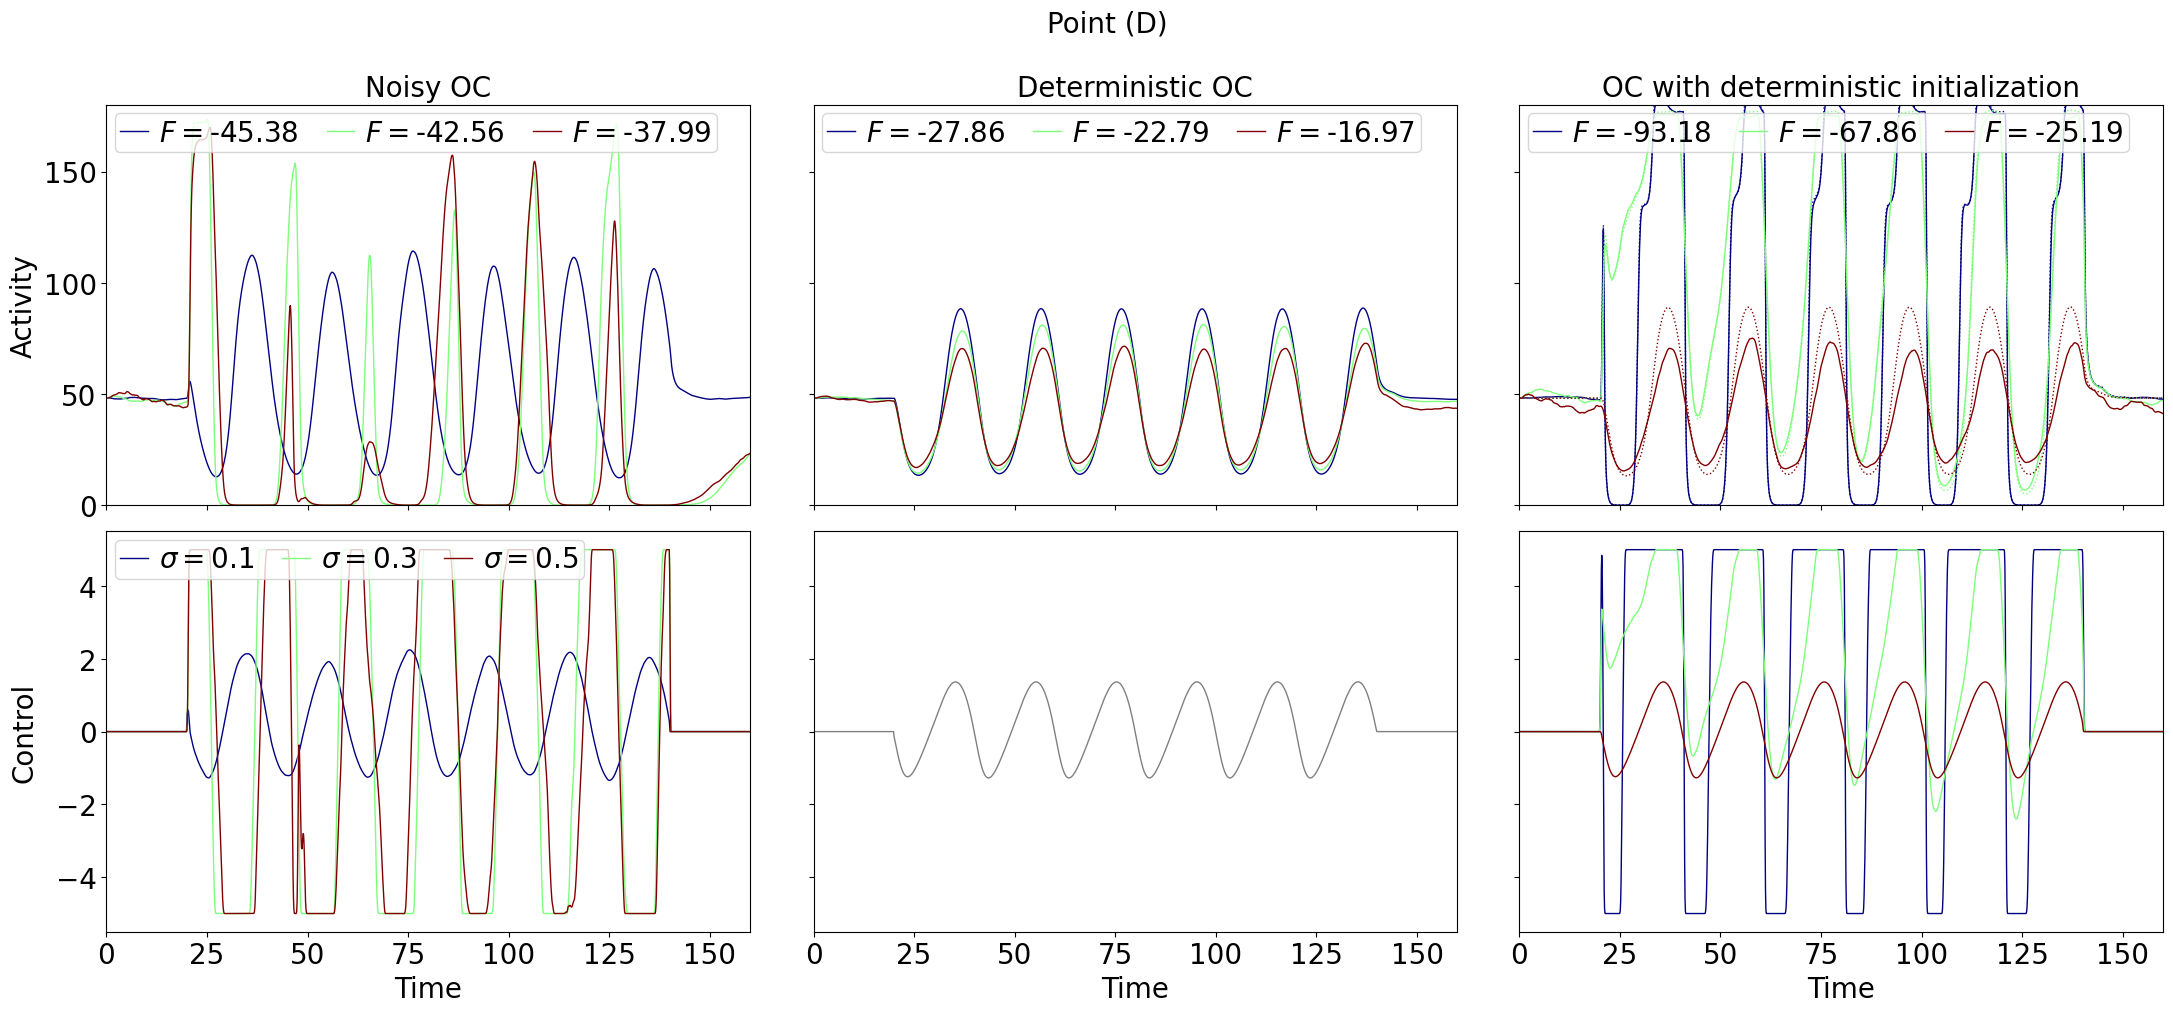

-45.38 & -42.559 & -37.995 & -27.865 & -22.788 & -16.969 & -93.18 & -67.862 & -25.192 \\


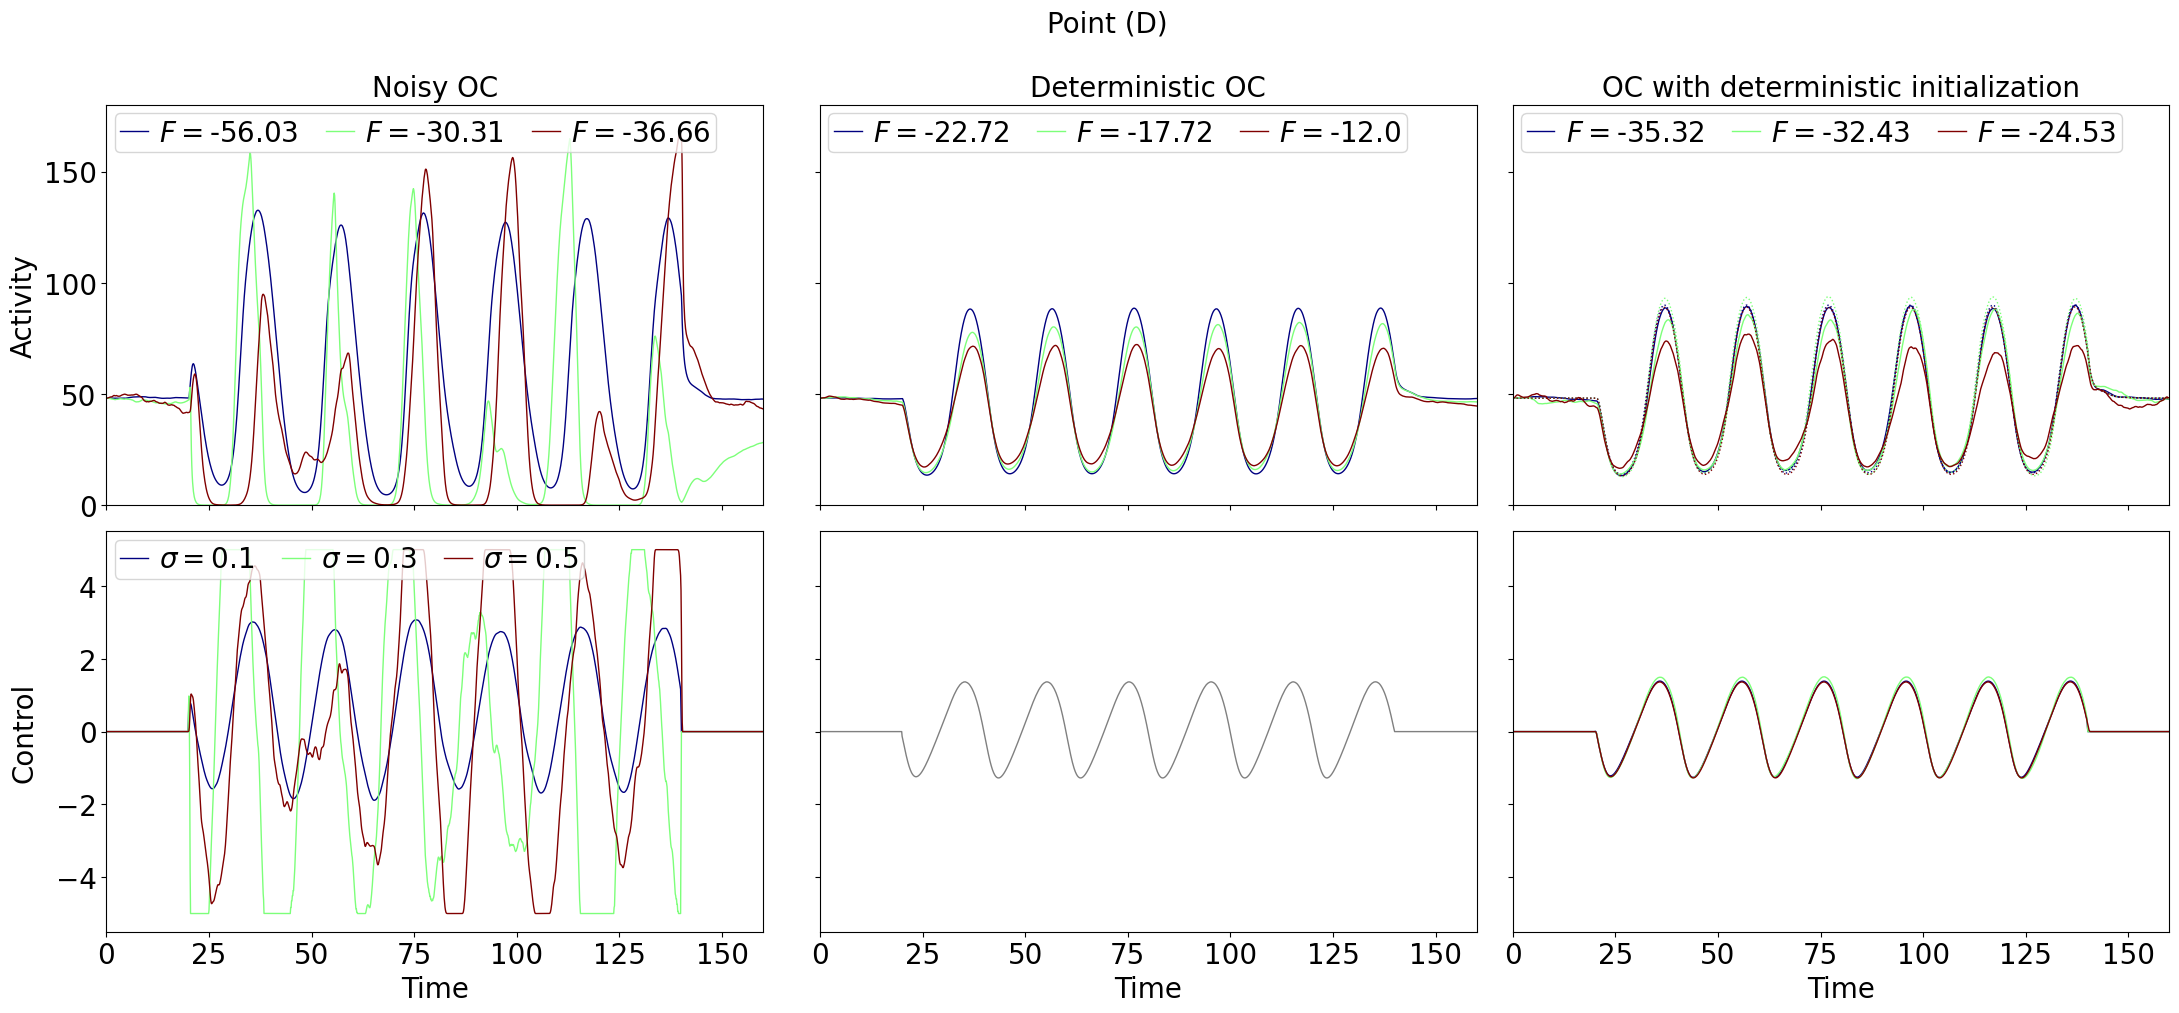

-56.028 & -30.311 & -36.661 & -22.722 & -17.721 & -11.997 & -35.316 & -32.43 & -24.526 \\


In [16]:
for wind in range(w2_n):

        plot_1n_osc_noisy(
                data_noisy["state"][wind], data_noisy["control"][wind], data_noisy["cost"][wind],
                data_noisy["state_det"][wind], data_noisy["control_det"], data_noisy["cost_det"][wind],
                data_noisy["state_det_opt"][wind], data_noisy["control_det_opt"][wind], data_noisy["cost_det_opt"][wind],
                data["D"]["state"][1], data_noisy["state_det_opt_det"][wind],
                duration, dt, sigma_array,  M, os.path.join(dir, "ALN_w1D_noisy" + str(wind) + ".pdf"))

        tablestring = ""
        for si in range(len(sigma_array)):
                tablestring = tablestring + str(np.around(data_noisy["cost"][wind][si],3)) + " & "
        for si in range(len(sigma_array)):
                tablestring = tablestring + str(np.around(data_noisy["cost_det"][wind][si],3)) + " & "
        for si in range(len(sigma_array)):
                tablestring = tablestring + str(np.around(data_noisy["cost_det_opt"][wind][si],3)) + " & "
        tablestring = tablestring[:-3]
        tablestring = tablestring + " \\" + "\\"

        print(tablestring)

In [15]:
for wind in range(1, w2_n):

        for si in range(len(sigma_array)):
        
                print("SIGMA = ", sigma_array[si])
                w2 = data_noisy["w1"][wind]

                model.params.sigma_ou = sigma_array[si]
                model.params.duration = duration
                setinitstate(model, data["D"]["init_state"])

                model.params["ext_exc_current"] = zero_control[:,0,:]
                model.params["ext_inh_current"] = zero_control[:,0,:]
                model.params.mue_ext_mean = p[0]
                model.params.mui_ext_mean = p[1]
                model.run()

                if True:


                        model_controlled = oc_aln.OcAln(model, target_period, print_array=pr, cost_interval=(int0,int1), control_interval=(int0, int1),
                                                        cost_matrix=costmat, control_matrix=controlmat, M=M, M_validation=M*10, validate_per_step=False,
                        )
                        model_controlled.weights["w_p"] = 0.
                        model_controlled.weights["w_1D"] = w2
                        model_controlled.weights["w_f"] = 1.

                        model_controlled.maximum_control_strength = maxstr

                        if True:
                                if type(data_noisy["control"][wind][si]) != type(None):
                                        model_controlled.control = data_noisy["control"][wind][si].copy()
                                        model_controlled.update_input()

                        for l in range(2):
                                for k in range(-8,1,2):
                                        model_controlled.step = 10.**k
                                        model_controlled.optimize(it)
                                        model_controlled.zero_step_encountered = False
                                        model_controlled.control[0,0,:] = smooth(model_controlled.control.copy()[0,0,:], 2)
                                        model_controlled.update_input()

                        data_noisy["control"][wind][si] = model_controlled.control.copy()
                        data_noisy["cost"][wind][si] = model_controlled.cost_validation

                        meanstate = model_controlled.get_xs()
                        for m in range(M-1):
                                model_controlled.model.run()
                                meanstate += model_controlled.get_xs()
                        data_noisy["state"][wind][si] = meanstate / M
                
                #################################################
                data_noisy["cost_det"][wind][si], data_noisy["state_det"][wind][si] = get_noisy_cost(data_noisy["control_det"], M, sigma_array[si], model_controlled.weights["w_f"], model_controlled.weights["w_1D"])
                print("cost det = ", data_noisy["cost_det"][wind][si])

                #################################################

                if True:

                        model_controlled = oc_aln.OcAln(model, target_period, print_array=pr, cost_interval=(int0,int1), control_interval=(int0, int1),
                                                        cost_matrix=costmat, control_matrix=controlmat, M=M, M_validation=M*10, validate_per_step=False,
                        )

                        model_controlled.weights["w_p"] = 0.
                        model_controlled.weights["w_1D"] = w2
                        model_controlled.weights["w_f"] = 1.
                        model_controlled.maximum_control_strength = maxstr

                        model_controlled.control = data_noisy["control_det"].copy()

                        if True:
                                if type(data_noisy["control_det_opt"][wind][si]) != type(None):
                                        model_controlled.control = data_noisy["control_det_opt"][wind][si].copy()
                        
                        model_controlled.update_input()
                        
                        for l in range(2):
                                for k in range(-8,1,2):
                                        model_controlled.step = 10.**k
                                        model_controlled.optimize(it)
                                        model_controlled.zero_step_encountered = False
                                        model_controlled.control[0,0,:] = smooth(model_controlled.control.copy()[0,0,:], 2)
                                        model_controlled.update_input()

                        data_noisy["control_det_opt"][wind][si] = model_controlled.control.copy()
                        data_noisy["cost_det_opt"][wind][si] = model_controlled.cost_validation

                        model_controlled.update_input()

                        meanstate = model_controlled.get_xs()
                        for m in range(M-1):
                                model_controlled.model.run()
                                meanstate += model_controlled.get_xs()
                        data_noisy["state_det_opt"][wind][si] = meanstate / M

                if True:
                        model.params.sigma_ou = 0.
                        model.params.duration = duration
                        model.params.mue_ext_mean = p[0]
                        model.params.mui_ext_mean = p[1]
                        setinitstate(model, data["D"]["init_state"])

                        model.params["ext_exc_current"] = data_noisy["control_det_opt"][wind][si][:,0,:]
                        model.params["ext_inh_current"] = data_noisy["control_det_opt"][wind][si][:,1,:]

                        model.run()
                        data_noisy["state_det_opt_det"][wind][si] = getstate(model)

                with open(os.path.join(pickledir, 'osc_1n_aln_noisy_w1D.pickle'), 'wb') as f:
                        pickle.dump(data_noisy, f)

SIGMA =  0.1
Optimal control with target oscillation period
Compute control for a noisy system
Mean cost in iteration 0: -1.4026164967618184
Mean cost in iteration 10: -1.3359346774256233
Mean cost in iteration 20: -1.4581310450073388
Mean cost in iteration 30: -1.4263384729359496
Mean cost in iteration 40: -1.4101767829229397
Mean cost in iteration 50: -1.4486814164887825
Mean cost in iteration 60: -1.475453244740033
Mean cost in iteration 70: -1.2780286367217024
Mean cost in iteration 80: -1.3073036429080926
Mean cost in iteration 90: -1.448418757394751
Mean cost in iteration 100: -1.453292491444483
Minimal cost found at iteration 66
Final cost validated with 1000 noise realizations : -1.4077380906930717
Compute control for a noisy system
Mean cost in iteration 0: -1.4364803755721727
Mean cost in iteration 10: -1.2765370482784093
Mean cost in iteration 20: -1.4348487869658442
Mean cost in iteration 30: -1.3487418742537924
Mean cost in iteration 40: -1.4188116611053063
Mean cost in it

In [9]:
def get_noisy_cost(control, M, sigma, wf, w2):

    mod = copy.deepcopy(model)

    mod.params.sigma_ou = sigma
    mod.params["ext_exc_current"] = control[:,0,:]
    mod.params["ext_inh_current"] = control[:,1,:]
    
    mod.run()
    state = getstate(mod)
    cost_f = wf * np.sum(cost_functions.fourier_cost(state, dt, data_noisy["target_period"], costmat, [int0, int1]))
    cost_2 = w2 * np.sum(cost_functions.L2_cost(control))*dt

    for m in range(1,10*M):
        mod.run()
        state_add = getstate(mod)
        cost_f_add = wf * np.sum(cost_functions.fourier_cost(state_add, dt, data_noisy["target_period"], costmat, [int0, int1]))

        cost_f += cost_f_add
        state += state_add

    return cost_2 + cost_f/(10*M), state/(10*M)

import scipy.fftpack


def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth
